<a href="https://colab.research.google.com/github/nhucccc/baitap/blob/main/CNTT_17_01_Ng%E1%BB%8D_Quang_Huy_BKT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Danh sách sheet trong file: ['Phân tích theo tháng']

Dữ liệu ban đầu:
      Tháng  Doanh thu (VND)  Số lượng khách  Tăng trưởng (%)  \
0   2023-01      388787682.0          9697.0              NaN   
1   2023-02      328343586.0          8371.0       -15.546814   
2   2023-03      402002817.0          9761.0        22.433583   
3   2023-04      372156091.0          9190.0        -7.424507   
4   2023-05      362305744.0             NaN        -2.646832   
5   2023-06      300493167.0          7838.0       -17.060888   
6   2023-07              NaN         10411.0        37.651679   
7   2023-08      356076453.0          8987.0       -13.915068   
8   2023-09      375239667.0          9691.0         5.381770   
9   2023-10      369209496.0          8996.0        -1.607019   
10  2023-11      381739196.0          9808.0         3.393656   
11  2023-12      354637439.0          8822.0        -7.099548   

    Nhiệt độ trung bình (°C)  Lượng mưa trung bình (mm)  \
0                       

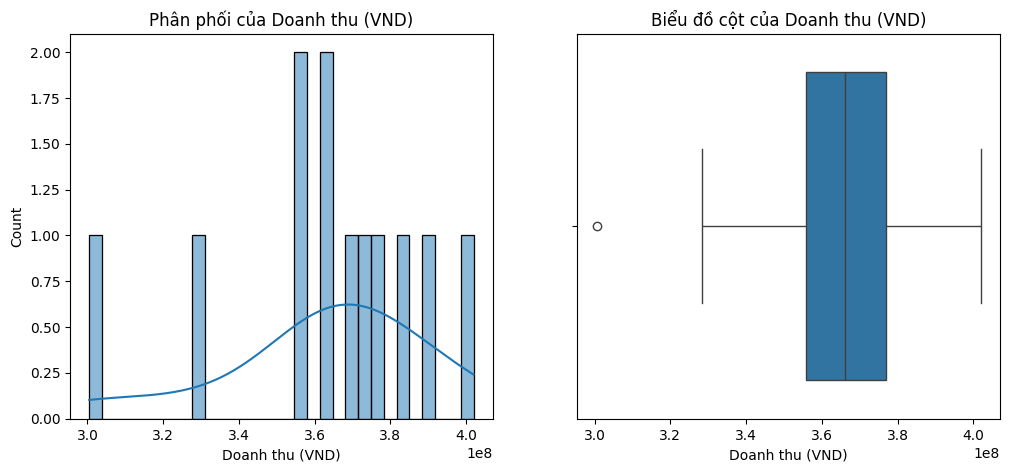

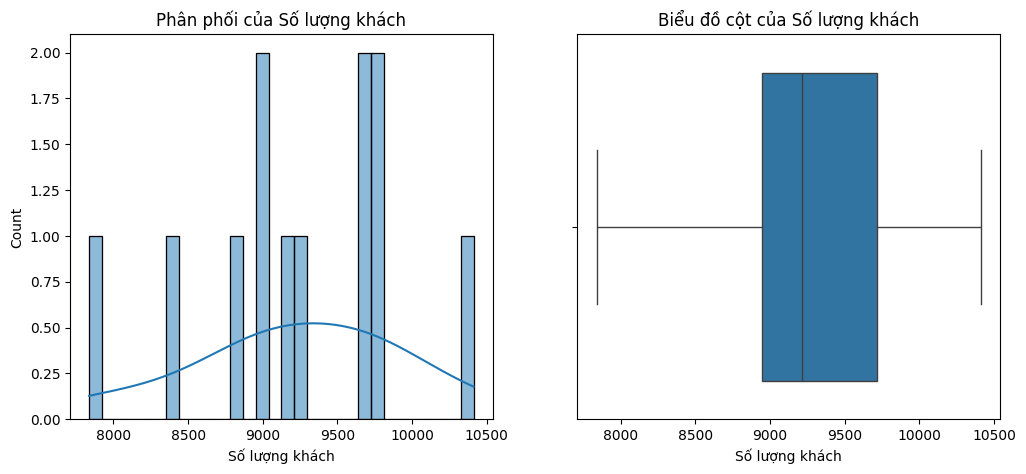

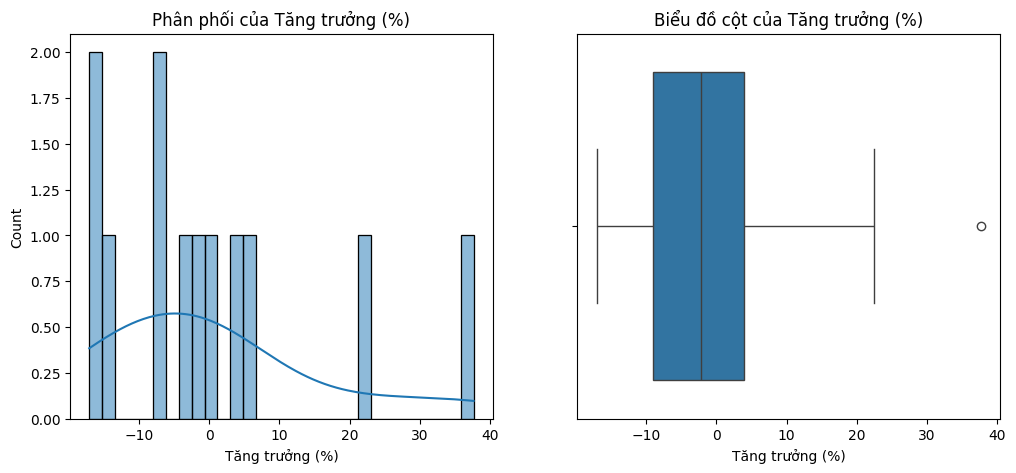

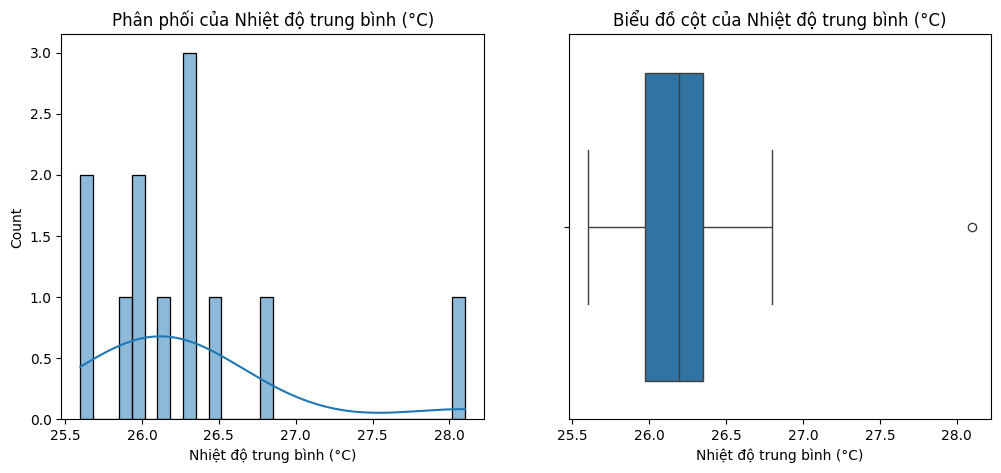

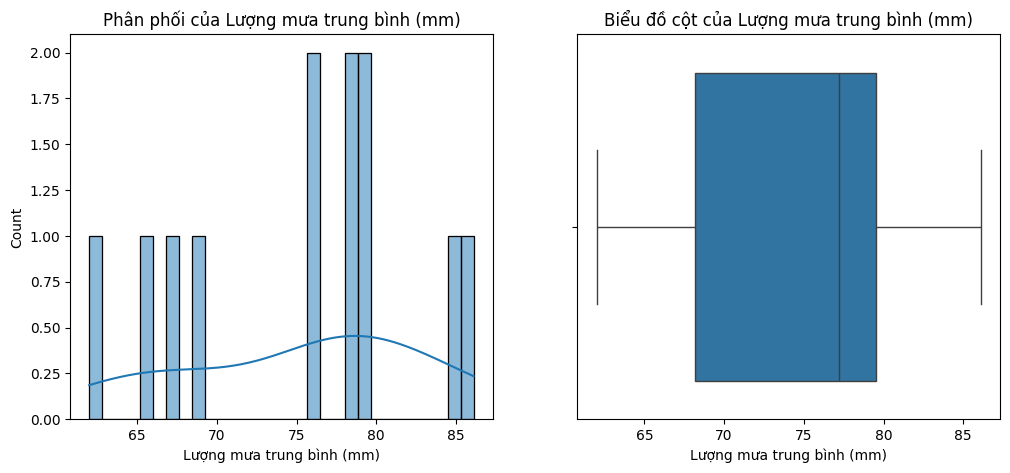

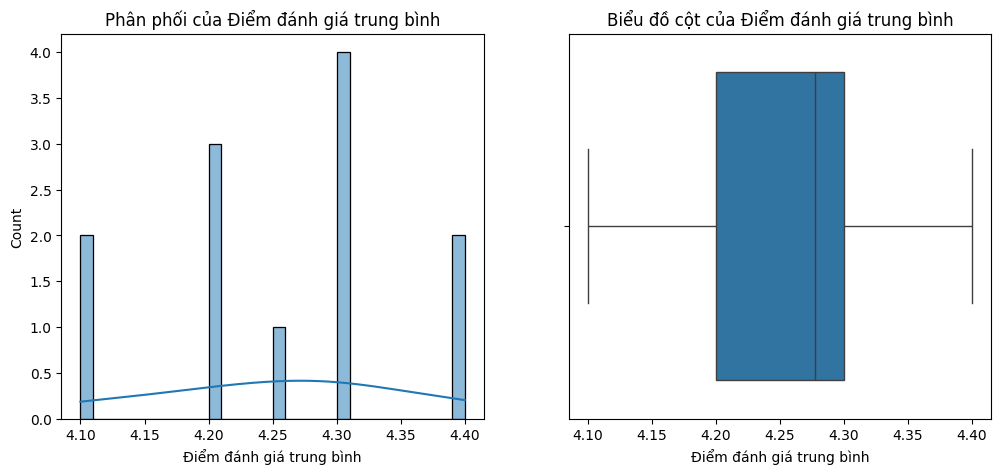

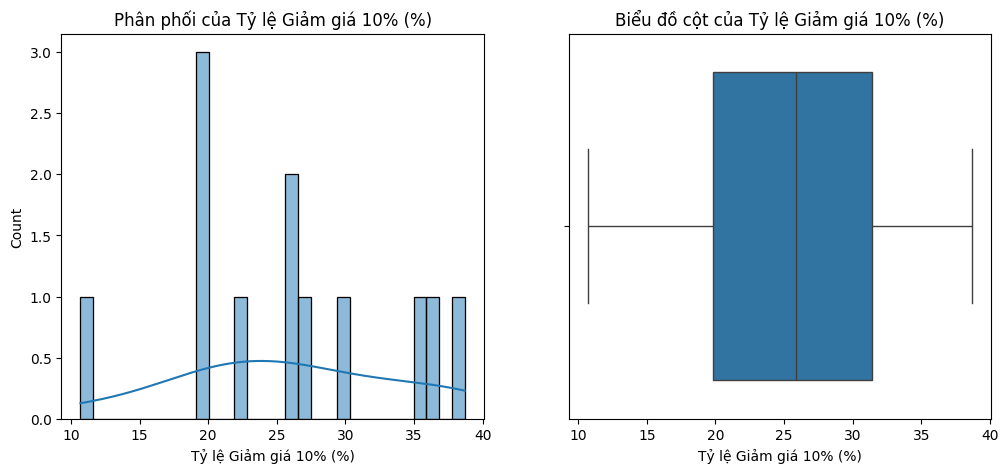

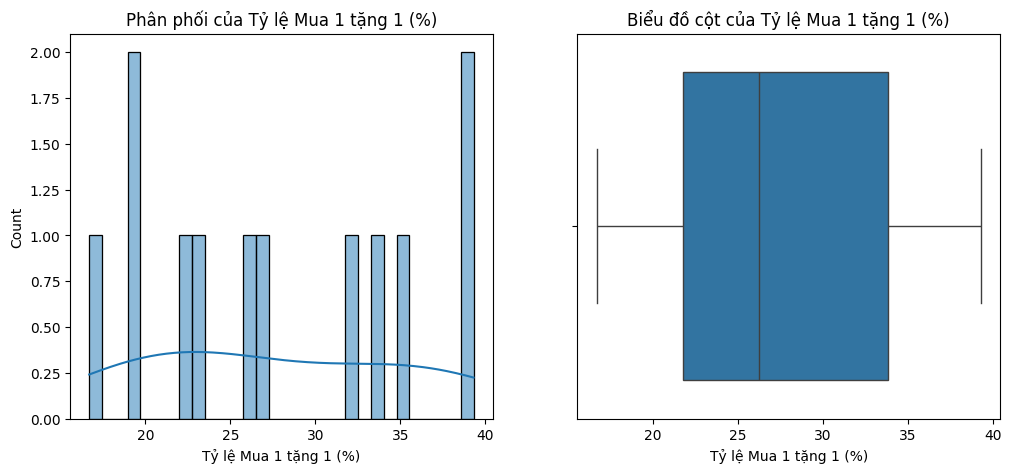

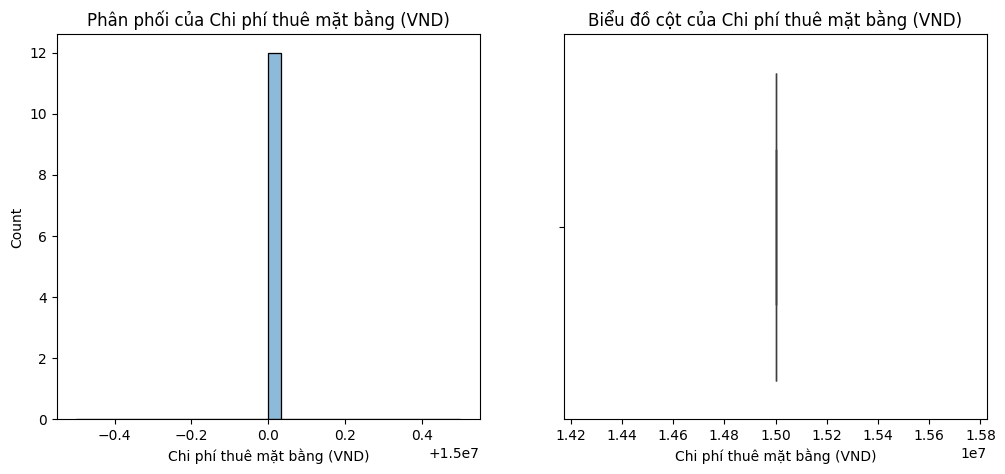

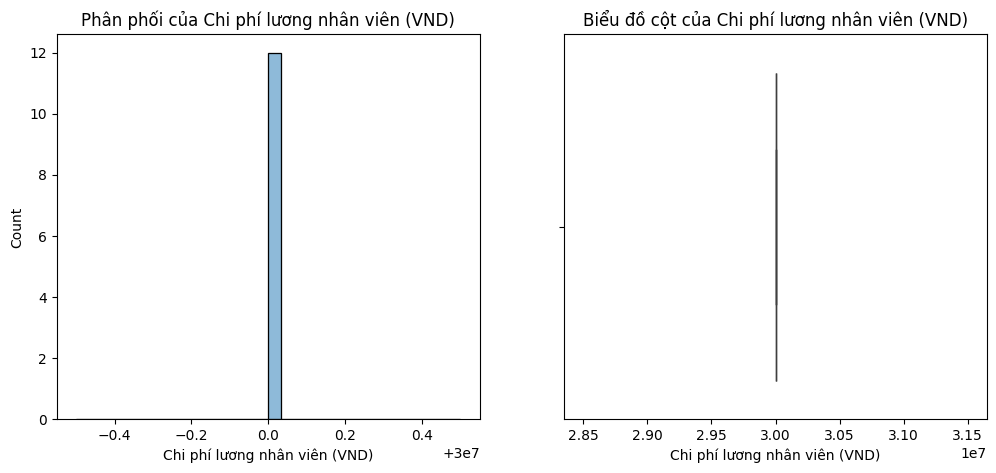

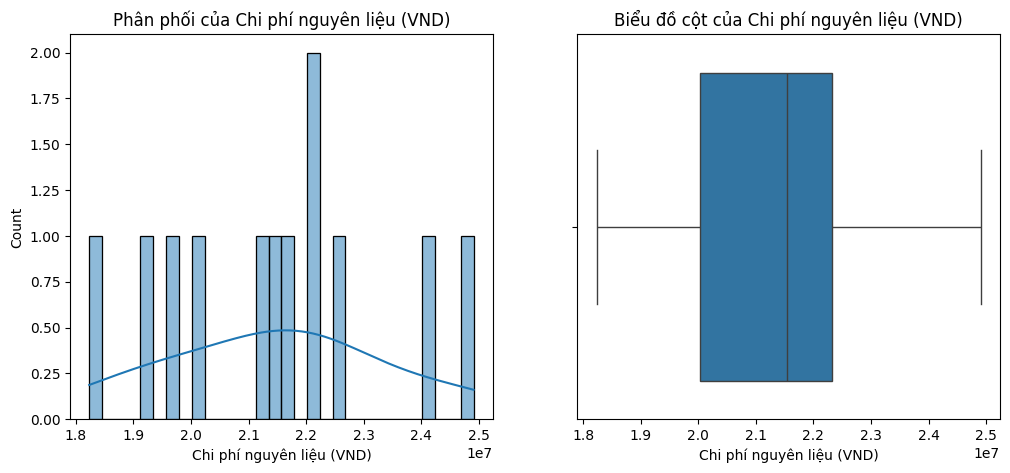


Đánh giá mô hình:
MSE: 7786638159212433.0
R2 Score: -117.78327202991774

Tóm tắt kết quả:
Mô hình chưa tốt, cần cải thiện thêm.

Những điểm cần cải thiện:
- Kiểm tra và loại bỏ các biến không quan trọng.
- Thêm các biến có liên quan để tăng tính giải thích của mô hình.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Đọc file Excel từ Google Drive
file_path = "/content/drive/My Drive/CNTT 17_01 - Ngọ Quang Huy - BTK2.xlsx"
xls = pd.ExcelFile(file_path)

print("Danh sách sheet trong file:", xls.sheet_names)

df = xls.parse(xls.sheet_names[0])
print("\nDữ liệu ban đầu:")
print(df)

#1  Làm sạch dữ liệu
# Kiểm tra và xử lý giá trị thiếu
missing_values = df.isnull().sum()
print("\nSố lượng giá trị thiếu trong từng cột:")
print(missing_values)

# Xử lý dữ liệu thiếu: Điền bằng trung bình của cột
df_cleaned = df.fillna(df.mean(numeric_only=True))

# Kiểm tra và xử lý dữ liệu sai định dạng
for col in df.select_dtypes(include=['object']).columns:
    invalid_values = df[~df[col].str.match(r'^[a-zA-Z0-9\s]+$', na=False)]
    if not invalid_values.empty:
        print(f"\nGiá trị không hợp lệ trong cột {col}:")
        print(invalid_values)
        df_cleaned[col] = df[col].astype(str).str.replace('[^a-zA-Z0-9\s]', '', regex=True)

#2. In ra dữ liệu sau khi làm sạch
print("\nDữ liệu sau khi làm sạch:")
print(df_cleaned.head())

#Lưu lại file đã làm sạch vào Google Drive
output_path = "/content/drive/My Drive/CNTT_Cleaned.xlsx"
df_cleaned.to_excel(output_path, index=False)
print(f"\nDữ liệu đã làm sạch được lưu vào: {output_path}")

#Bước 3. Phân tích dữ liệu khám phá (EDA)
print("\nChỉ số thống kê cơ bản:")
print(df_cleaned.describe())

# Vẽ biểu đồ cột và phân phối
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Phân phối của {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Biểu đồ cột của {col}')

    plt.show()

# Bước 4: Xây dựng mô hình
# 4.1. Chuẩn bị dữ liệu
target_column = 'Doanh thu (VND)'
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# 4.2. Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.3. Xây dựng mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# 4.4. Đánh giá mô hình
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nĐánh giá mô hình:")
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

# Bước 5. Phân tích kết quả:
print("\nTóm tắt kết quả:")
if r2 > 0.7:
    print("Mô hình dự đoán tốt với R2 cao.")
elif r2 > 0.4:
    print("Mô hình dự đoán ở mức trung bình, có thể cải thiện.")
else:
    print("Mô hình chưa tốt, cần cải thiện thêm.")

print("\nNhững điểm cần cải thiện:")
print("- Kiểm tra và loại bỏ các biến không quan trọng.")
print("- Thêm các biến có liên quan để tăng tính giải thích của mô hình.")